# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [4]:
from __future__ import print_function


try:
    from StringIO import BytesIO as io
except ImportError:
    from io import BytesIO as io

try:
    from urllib import urlencode as urlencode
except ImportError:
    from urllib.parse import urlencode as urlencode
    
try:
    from urllib import urlopen as urlopen
except ImportError:
    from urllib.request import urlopen as urlopen
    
try:
    from urllib2 import HTTPError as HTTPError
except ImportError:
    from urllib.error import HTTPError as HTTPError

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve   
import geopandas as gpd
import pandas as pd
import numpy as np
#import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
import pandas as pd
import zipfile 

import os
os.environ["PUIDATA"] = '/nfshome/em3845/PUIData'
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
urls = ['https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp00totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp01totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp02totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp03totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp04totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp05totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp06totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp07totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp08totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp09totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp10totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp11totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp12totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp13totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp14totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp94totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp95totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp96totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp97totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp98totals.zip','https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp99totals.zip']
fnames = ['zbp00totals.zip','zbp01totals.zip','zbp02totals.zip','zbp03totals.zip','zbp04totals.zip','zbp05totals.zip','zbp06totals.zip','zbp07totals.zip','zbp08totals.zip','zbp09totals.zip','zbp10totals.zip','zbp11totals.zip','zbp12totals.zip','zbp13totals.zip','zbp14totals.zip','zbp94totals.zip','zbp95totals.zip','zbp96totals.zip','zbp97totals.zip','zbp98totals.zip','zbp99totals.zip']

In [6]:
for i in range(len(urls)):
    url = urls[i]   
    dst = os.getenv('PUIDATA')+'/'+fnames[i]    
    urllib.request.urlretrieve(url, dst)

NameError: name 'urllib' is not defined

In [7]:
dfs = []
for j in range(len(fnames)):
    #print(j)
    zf = zipfile.ZipFile(os.getenv('PUIDATA')+'/'+fnames[j])
    df = pd.read_csv(zf.open(fnames[j].replace('.zip','.txt')))
    df.columns = [x.lower() for x in df.columns]
    dfs.append(df)

dfs[0].head()

,zip,name,empflag,emp,qp1,ap,est
0,501,"HOLTSVILLE, NY",A,0,0,0,1
1,1001,"AGAWAM, MA",NaN,8042,59833,259661,493
2,1002,"AMHERST, MA",NaN,6547,36719,169658,563
3,1003,"AMHERST, MA",NaN,82,308,2482,13
4,1004,"AMHERST, MA",NaN,717,2049,5826,48


In [8]:
columns = ['94','95','96','97','98','99','00','01','02','03','04','05','06','07','08','09','10','11','12','13','14']

df_new = dfs[0]
df_new  = df_new[['zip','est']]
df_new.rename(columns={'est':columns[0]},inplace=True)

for i in range(len(dfs)):
    
    df = dfs[i][['zip','est']]   
    if i!=0:
        df.rename(columns={'est':columns[i]},inplace=True)
        df_new =df_new.merge(df,on="zip",how='inner')
df_new        

/nfshome/em3845/.conda/envs/myEnv/lib/python2.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,zip,94,95,96,97,98,99,00,01,02,...,05,06,07,08,09,10,11,12,13,14
0,1001,493,490,490,505,500,509,509,503,477,...,436,453,439,458,439,439,433,457,444,469
1,1002,563,587,566,586,584,589,582,596,584,...,558,572,572,560,450,467,487,500,490,558
2,1003,13,13,15,16,15,12,12,16,17,...,16,15,15,18,10,10,13,15,14,13
3,1004,48,37,23,21,43,31,30,20,18,...,19,16,16,13,47,48,47,41,31,35
4,1005,86,90,94,93,97,94,98,106,97,...,91,94,97,97,92,95,101,104,95,82
5,1007,219,228,212,230,232,225,238,243,246,...,217,217,221,226,182,172,183,183,183,194
6,1008,21,27,28,25,21,19,18,18,16,...,20,18,18,18,18,19,14,17,18,18
7,1009,17,20,19,22,20,22,21,18,19,...,14,16,16,17,14,16,15,18,17,14
8,1010,73,72,70,68,66,64,78,74,75,...,79,78,73,74,50,53,62,64,63,71
9,1011,17,26,22,18,14,17,15,17,15,...,16,16,13,15,16,18,19,13,15,16


In [9]:
df_new.fillna(0, inplace = True)
df_new.shape

(35885, 22)

In [10]:
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
f = 'zipcodes.zip'
# dst = os.getenv('PUIDATA')+'/'+f 
# urllib.request.urlretrieve(url, dst)
zf = zipfile.ZipFile(os.getenv('PUIDATA')+'/'+f)
shapefile = 'ZIP_CODE_040114.shp'
shapeFilePath = os.getenv('PUIDATA') + '/' + shapefile
zips = gpd.GeoDataFrame.from_file(shapeFilePath)
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [11]:
zips.rename(columns={'ZIPCODE':'zip'},inplace=True)
zips = zips[['zip','geometry']]
zips.head()

,zip,geometry
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [12]:
import geopandas as gp
nyczipsshp = zips
#nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.zip)), "POLYGONS:",
      len(nyczipsshp.zip),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.zip.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [13]:
df_new['zip']=df_new['zip'].astype(str)
cbs = zips.merge(df_new,on='zip')
cbs1=cbs.drop(['zip', 'geometry'], axis=1)

In [14]:
# 20 years of data and 263 zipcodes
cbs1.shape

(243, 21)

In [15]:
#cleaning all missing values
cleancsb = cbs1.dropna()
cleancsb.shape

(243, 21)

In [64]:
#then the standardization will look like:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T

In [17]:
vals.mean(axis=1)

0     -3.277801e-16
1     -1.427430e-16
2      4.599495e-16
3     -1.744636e-16
4     -2.696256e-16
5      7.401487e-16
6     -1.744636e-16
7     -3.595008e-16
8      2.537653e-16
9      4.335157e-16
10    -2.246880e-17
11    -1.459150e-15
12     5.603983e-16
13     7.930164e-16
14     2.220446e-16
15     2.220446e-16
16    -3.172066e-17
17    -1.194811e-15
18    -1.194811e-15
19    -1.194811e-15
20     4.546628e-16
21     7.401487e-17
22     6.555603e-16
23     1.163091e-16
24    -6.079793e-16
25    -6.661338e-16
26    -4.546628e-16
27     6.291264e-16
28    -7.718693e-16
29    -1.987828e-15
           ...     
213   -2.590520e-16
214    1.744636e-16
215    8.987520e-17
216    2.643388e-17
217    1.691768e-16
218    1.374562e-16
219    6.661338e-16
220    7.930164e-17
221    8.987520e-17
222   -6.317698e-16
223    5.286776e-16
224    2.431917e-16
225    4.070818e-16
226   -2.907727e-16
227   -1.480297e-16
228    1.797504e-16
229    1.903239e-16
230   -6.344132e-16
231   -1.453863e-17


In [18]:
vals.mean(axis=1).shape

(243,)

In [19]:
vals.std(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
213    1.0
214    1.0
215    1.0
216    1.0
217    1.0
218    1.0
219    1.0
220    1.0
221    1.0
222    1.0
223    1.0
224    1.0
225    1.0
226    1.0
227    1.0
228    1.0
229    1.0
230    1.0
231    1.0
232    1.0
233    1.0
234    1.0
235    1.0
236    1.0
237    1.0
238    1.0
239    1.0
240    1.0
241    1.0
242    1.0
Length: 243, dtype: float64

In [20]:
vals.std(axis=1).shape

(243,)

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

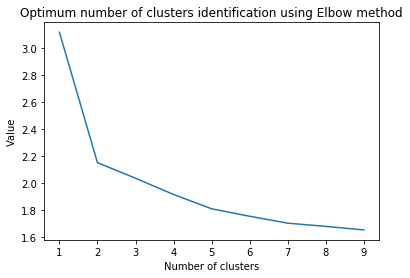

In [25]:
from scipy.spatial.distance import cdist

elbow = []
r = range(1,10)
for nc in range(1,10):
    km = KMeans(n_clusters=nc,random_state=444).fit(vals)
    km.fit(vals)
    elbow.append(sum(np.min(cdist(vals, km.cluster_centers_, 'euclidean'), axis=1)) / vals.shape[0])

plt.plot(r, elbow, '-')
plt.xlabel('Number of clusters')
plt.ylabel('Value')
plt.title('Optimum number of clusters identification using Elbow method')
plt.show()

# From the elbow method above, it seems that 2 is the optimum number of clusters. But Im using n = 5 to achieve same plot as provided in example.

In [34]:
from sklearn.cluster import KMeans

nc = 5
#cluster with kmeans
km = KMeans(n_clusters=nc, random_state=444).fit(vals)


In [37]:
df_with_labels = cbs[['zip','geometry']]
df_with_labels['label'] = km.labels_
df_with_labels

/nfshome/em3845/.conda/envs/myEnv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,zip,geometry,label
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",4
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",4
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",4
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",4
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",4
5,11226,"POLYGON ((994821.4729396403 177865.7178093046,...",4
6,11219,"POLYGON ((987286.3515269756 173946.4621963799,...",4
7,11210,"POLYGON ((995796.0097044706 171110.0666224658,...",4
8,11230,"POLYGON ((994099.2959063053 171240.7064530551,...",2
9,11204,"POLYGON ((989500.1699339747 170730.1687602103,...",4


In [38]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape

(243,)

### The map of the clusters may look something like this

In [32]:
! pip install git+https://github.com/fedhere/choroplethNYC.git
%run ~/choroplethNYC.py

  Cloning https://github.com/fedhere/choroplethNYC.git to /tmp/pip-2zplw7i9-build
  Using cached https://files.pythonhosted.org/packages/24/11/d77c157c16909bd77557d00798b05a5b6615ed60acb5900fbe6a65d35e93/geopandas-0.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/38/b6/b53f19062afd49bb5abd049aeed36f13bf8d57ef8f3fa07a5203531a0252/Shapely-1.6.4.post2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/51/d8/2a97aea07eed6675187c42411bfca30816dfdd6831c125c123bac74f0465/Fiona-1.8.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/95/dd/fef84cf1678418f241ef542c0288bdf215bdd3e35f1fe03dc5223a2e80ba/click_plugins-1.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e4/be/30a58b4b0733850280d01f8bd132591b4668ed5c7046761098d665ac2174/cligj-0.5.0-py3-none-any.whl
Exception:
Traceback (most recent call last):
  File "/usr/local/Anaconda3-5.0.0-Linux-x86_64/lib/pytho

<Figure size 432x288 with 0 Axes>

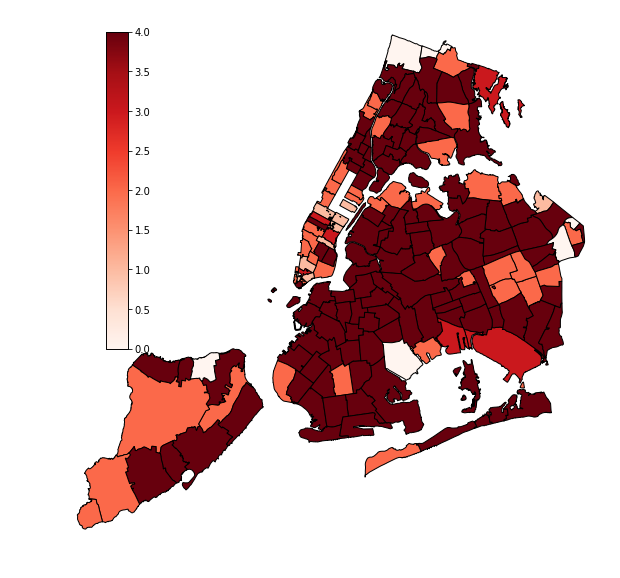

In [42]:
choroplethNYC(df_with_labels, column='label', color="white", edgecolor="black", lw=1,cmap = 'Reds');

### Figure: Cluster assignment per NYC zip code, N=5.

In [58]:
vals1 = vals
vals1['labels'] = km.labels_
vals1.columns

Index([u'94', u'95', u'96', u'97', u'98', u'99', u'00', u'01', u'02', u'03',
       u'04', u'05', u'06', u'07', u'08', u'09', u'10', u'11', u'12', u'13',
       u'14', u'labels'],
      dtype='object')

### Figure 3: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

/nfshome/em3845/.conda/envs/myEnv/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fa544aa1e90>)

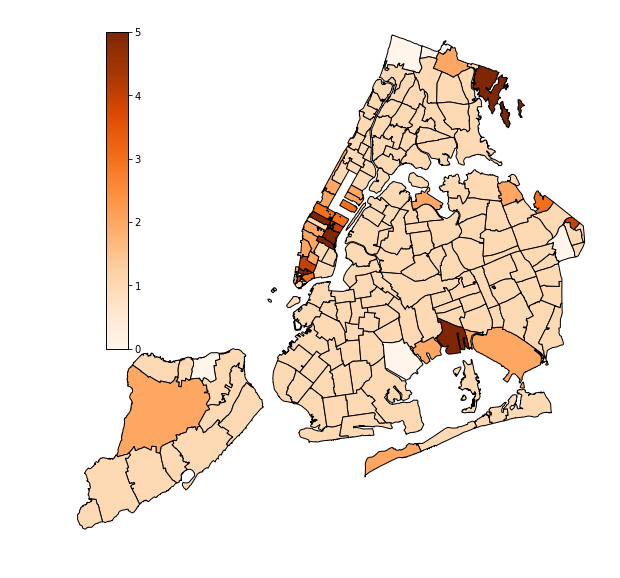

In [67]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(preference=-100).fit(vals)
labels = ap.labels_
df_with_labels1 = cbs[['zip','geometry']]
df_with_labels1['label'] = labels

choroplethNYC(df_with_labels1,column='label',edgecolor='black',cmap="Oranges")

### Figure 9: 
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

/nfshome/em3845/.conda/envs/myEnv/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fa54646ee10>)

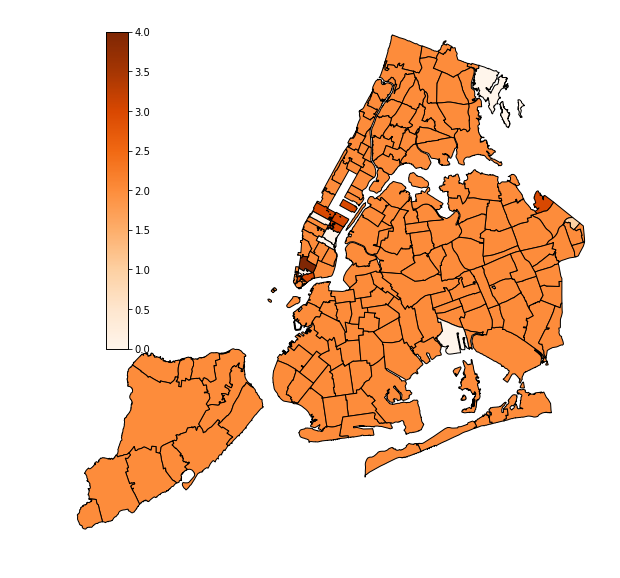

In [69]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))

df_with_labels2 = cbs[['zip','geometry']]
df_with_labels2['label'] = labelsag

choroplethNYC(df_with_labels2,column='label',edgecolor='black',cmap="Oranges")
